# The Sparks Foundation

# Time Line Analysis Covid-19

# Name :- Pratik Sonune

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import random 

In [2]:
import os
covid_data =("owid-covid-data.csv")
os.path.exists(covid_data)

True

In [3]:
covid_data = pd.read_csv("owid-covid-data.csv")
covid_data.head(20)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
covid_data.shape


(190906, 67)

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190906 entries, 0 to 190905
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    190906 non-null  object 
 1   continent                                   179806 non-null  object 
 2   location                                    190906 non-null  object 
 3   date                                        190906 non-null  object 
 4   total_cases                                 183376 non-null  float64
 5   new_cases                                   183182 non-null  float64
 6   new_cases_smoothed                          182008 non-null  float64
 7   total_deaths                                164922 non-null  float64
 8   new_deaths                                  164932 non-null  float64
 9   new_deaths_smoothed                         163769 non-null  float64
 

In [6]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.833760e+05,1.831820e+05,1.820080e+05,1.649220e+05,164932.000000,163769.000000,182530.000000,182336.000000,181167.000000,164089.000000,...,118976.000000,117345.000000,77287.000000,139572.000000,178520.000000,153243.000000,6.553000e+03,6553.000000,6553.000000,6553.000000
mean,3.280307e+06,1.236260e+04,1.238285e+04,6.463135e+04,158.368340,159.267930,41234.865315,185.857913,186.074077,586.679349,...,10.643974,32.791855,50.925467,3.068665,73.649481,0.725222,4.093095e+04,9.773072,15.594497,1117.569401
std,2.059785e+07,8.748773e+04,8.576913e+04,3.368298e+05,791.600823,774.875621,76685.996276,948.680535,618.311930,871.890330,...,10.580873,13.529633,31.856886,2.519987,7.449678,0.149732,1.138387e+05,16.007568,28.965876,1563.316733
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.670000e+03,0.000000e+00,6.714000e+00,9.400000e+01,0.000000,0.143000,783.226500,0.000000,1.501500,23.275000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.100000e+01,-0.120000,-0.280000,-6.412607
50%,3.542150e+04,7.100000e+01,1.010000e+02,9.130000e+02,1.000000,2.143000,6415.502500,10.268000,19.128000,164.600000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,4.269400e+03,6.570000,7.460000,574.011450
75%,3.775110e+05,1.029000e+03,1.138857e+03,8.434750e+03,18.000000,19.286000,51240.442250,101.973000,128.885000,844.371000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.786380e+04,14.700000,21.800000,1794.278748
max,5.312334e+08,4.079836e+06,3.437237e+06,6.297253e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6391.149000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


In [7]:
covid_data.nunique()

iso_code                                      244
continent                                       6
location                                      244
date                                          883
total_cases                                100680
                                            ...  
human_development_index                       154
excess_mortality_cumulative_absolute         6372
excess_mortality_cumulative                  3267
excess_mortality                             4032
excess_mortality_cumulative_per_million      6522
Length: 67, dtype: int64

In [8]:
covid_data.isnull().sum()

iso_code                                        0
continent                                   11100
location                                        0
date                                            0
total_cases                                  7530
                                            ...  
human_development_index                     37663
excess_mortality_cumulative_absolute       184353
excess_mortality_cumulative                184353
excess_mortality                           184353
excess_mortality_cumulative_per_million    184353
Length: 67, dtype: int64

In [9]:
covid_data.continent.value_counts()[0:10]

Africa           44258
Europe           41584
Asia             41115
North America    29617
Oceania          12571
South America    10661
Name: continent, dtype: int64

In [ ]:
dataset =covid_data[covid_data['date']*'2020-11-15']
dataset =dataset[-dataset['location'].isin(['word','international'])]
dataset.head()

In [11]:
india = covid_data[covid_data["location"] == "India"]
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
78931,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78932,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78933,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78934,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78935,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


In [12]:
india.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
79780,IND,Asia,India,2022-05-28,43153043.0,2828.0,2381.714,524586.0,14.0,24.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79781,IND,Asia,India,2022-05-29,43155749.0,2706.0,2479.429,524611.0,25.0,21.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79782,IND,Asia,India,2022-05-30,43158087.0,2338.0,2574.143,524630.0,19.0,20.000,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79783,IND,Asia,India,2022-05-31,43160832.0,2745.0,2662.857,524636.0,6.0,18.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
79784,IND,Asia,India,2022-06-01,43164544.0,3712.0,2817.714,524641.0,5.0,16.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


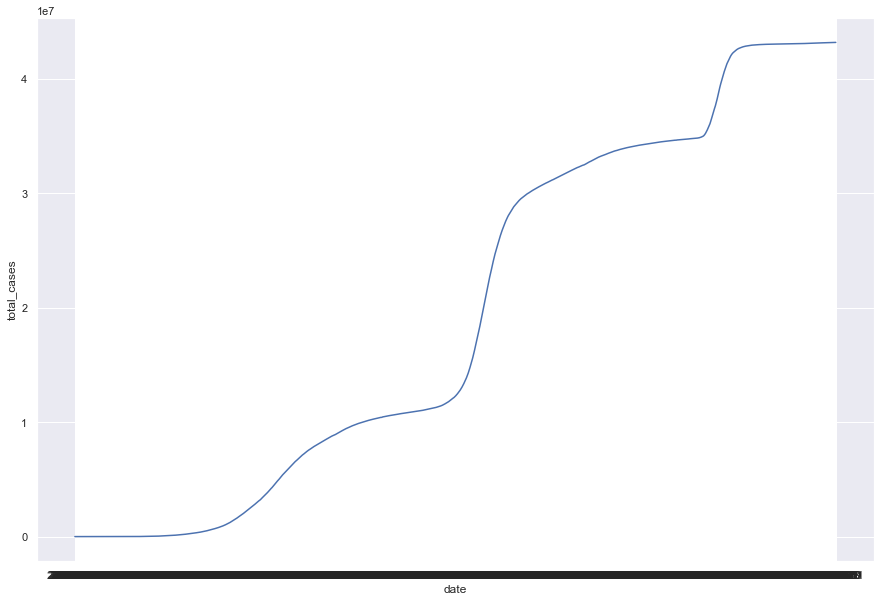

In [13]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data =india)
plt.show()

In [14]:
india_last_ten_days=india.tail(10)

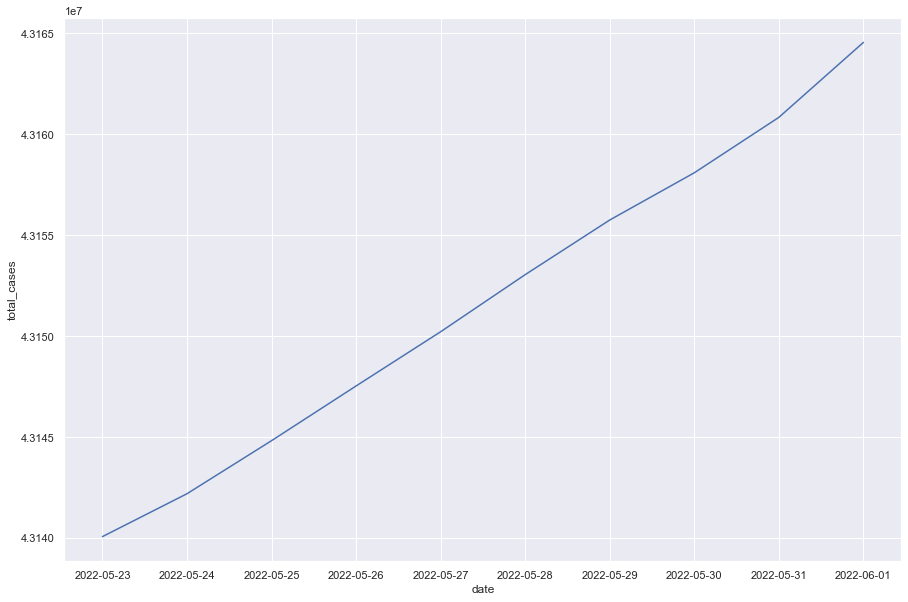

In [15]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data =india_last_ten_days)
plt.show()

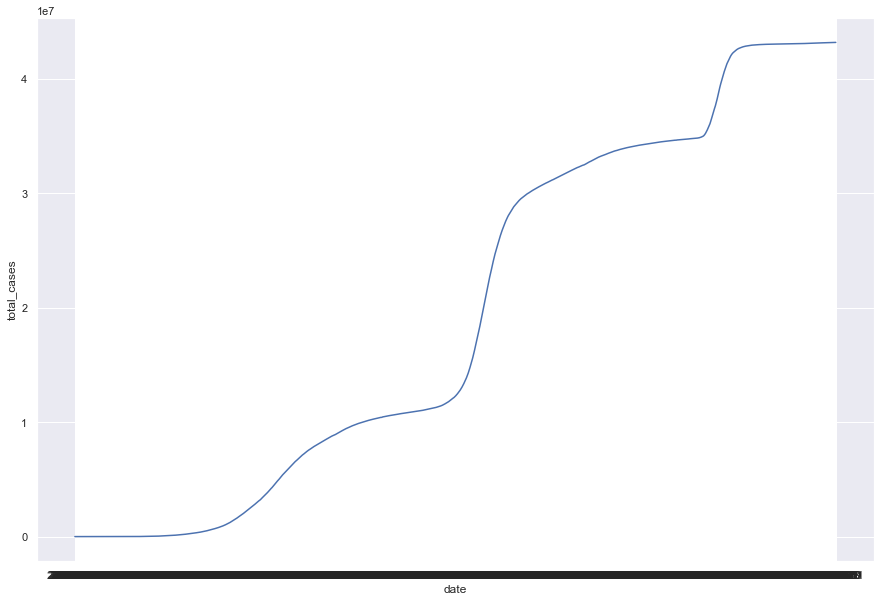

In [16]:

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data =india)
plt.show()

In [17]:
brazil=covid_data[covid_data["location"]=="Brazil"]
brazil.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
23856,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23857,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23858,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23859,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
23860,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23861,BRA,South America,Brazil,2020-03-02,2.0,0.0,0.286,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23862,BRA,South America,Brazil,2020-03-03,2.0,0.0,0.286,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23863,BRA,South America,Brazil,2020-03-04,4.0,2.0,0.429,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23864,BRA,South America,Brazil,2020-03-05,4.0,0.0,0.429,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23865,BRA,South America,Brazil,2020-03-06,13.0,9.0,1.714,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [18]:
brazil_last_ten_days=brazil.tail(10)

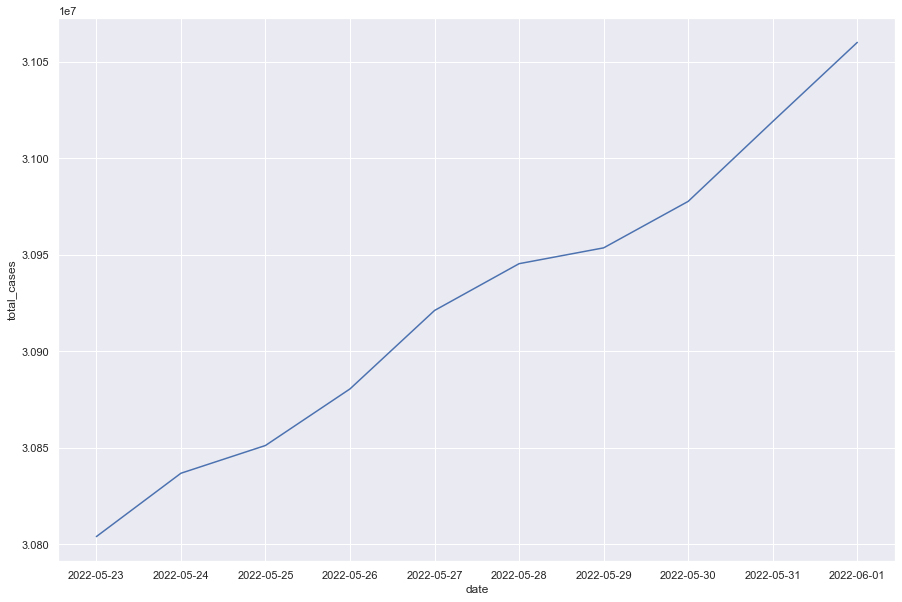

In [19]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data =brazil_last_ten_days)
plt.show()

In [20]:
germany_spain=covid_data[(covid_data["location"]=="Germany") |(covid_data["location"]=="spain")]

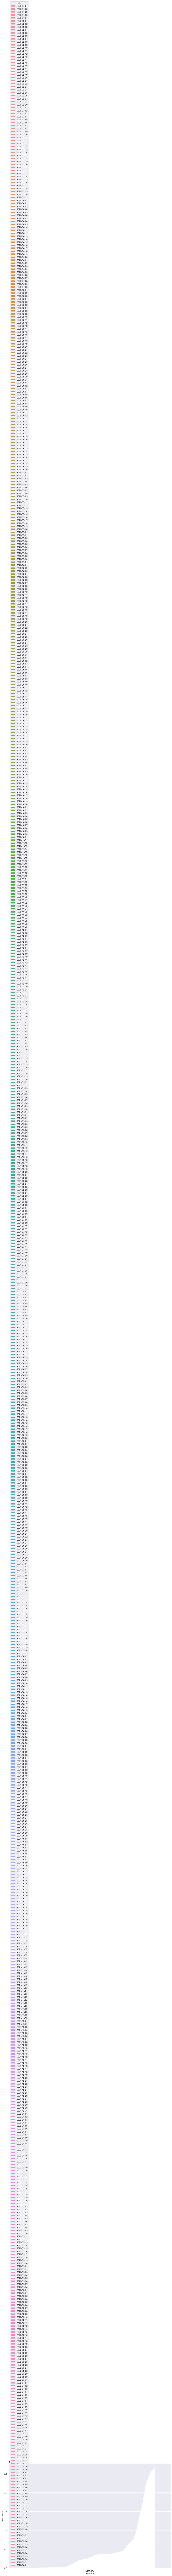

In [21]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data =germany_spain,hue="date" )
plt.show()

In [22]:
last_date_cases=covid_data[(covid_data["date"]=="2021-02-16")]
last_date_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
358,AFG,Asia,Afghanistan,2021-02-16,55518.0,4.0,19.143,2428.0,1.0,2.000,...,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1198,OWID_AFR,NaN,Africa,2021-02-16,3773025.0,9994.0,11446.571,99410.0,465.0,453.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026,ALB,Europe,Albania,2021-02-16,94651.0,801.0,1017.571,1582.0,15.0,13.429,...,7.100,51.200,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
2854,DZA,Africa,Algeria,2021-02-16,111069.0,175.0,215.714,2945.0,2.0,3.000,...,0.700,30.400,83.741,1.900,76.88,0.748,NaN,NaN,NaN,NaN
3676,AND,Europe,Andorra,2021-02-16,10555.0,17.0,34.714,107.0,0.0,0.143,...,29.000,37.800,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187179,WLF,Oceania,Wallis and Futuna,2021-02-16,9.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN
188042,OWID_WRL,NaN,World,2021-02-16,109925676.0,359161.0,377802.571,2490430.0,11320.0,11037.143,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
188825,YEM,Asia,Yemen,2021-02-16,2148.0,3.0,2.429,618.0,1.0,0.429,...,7.600,29.200,49.542,0.700,66.12,0.470,NaN,NaN,NaN,NaN
189631,ZMB,Africa,Zambia,2021-02-16,70823.0,575.0,887.571,974.0,15.0,13.286,...,3.100,24.700,13.938,2.000,63.89,0.584,NaN,NaN,NaN,NaN


In [23]:
maximum_cases_countary =last_date_cases.sort_values(by ="total_cases",ascending = False)
maximum_cases_countary

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
188042,OWID_WRL,NaN,World,2021-02-16,109925676.0,359161.0,377802.571,2490430.0,11320.0,11037.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
75140,OWID_HIC,NaN,High income,2021-02-16,57428020.0,176658.0,205356.429,1176244.0,5726.0,5749.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55696,OWID_EUR,NaN,Europe,2021-02-16,32818792.0,124920.0,131695.286,776909.0,4648.0,4031.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181910,OWID_UMC,NaN,Upper middle income,2021-02-16,32333405.0,133844.0,125423.714,927664.0,4569.0,4359.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126427,OWID_NAM,NaN,North America,2021-02-16,32043252.0,76784.0,98559.286,710135.0,3114.0,3445.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126966,PRK,Asia,North Korea,2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.200,72.27,NaN,NaN,NaN,NaN,NaN
128265,OWID_CYN,Asia,Northern Cyprus,2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128867,MNP,Oceania,Northern Mariana Islands,2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.74,NaN,NaN,NaN,NaN,NaN
139794,PRI,North America,Puerto Rico,2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.10,NaN,NaN,NaN,NaN,NaN


# Top 10 Country of Maximum Cases

In [24]:
maximum_cases_countary[1:11]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
75140,OWID_HIC,NaN,High income,2021-02-16,57428020.0,176658.0,205356.429,1176244.0,5726.0,5749.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55696,OWID_EUR,NaN,Europe,2021-02-16,32818792.0,124920.0,131695.286,776909.0,4648.0,4031.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181910,OWID_UMC,NaN,Upper middle income,2021-02-16,32333405.0,133844.0,125423.714,927664.0,4569.0,4359.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126427,OWID_NAM,NaN,North America,2021-02-16,32043252.0,76784.0,98559.286,710135.0,3114.0,3445.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180254,USA,North America,United States,2021-02-16,27921680.0,59222.0,82339.000,487095.0,1633.0,2199.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
9493,OWID_ASI,NaN,Asia,2021-02-16,24191156.0,68763.0,64680.571,387908.0,921.0,852.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56557,OWID_EUN,NaN,European Union,2021-02-16,21419687.0,90450.0,93043.000,520454.0,3136.0,2711.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101523,OWID_LMC,NaN,Lower middle income,2021-02-16,19646152.0,45806.0,44395.143,373702.0,970.0,873.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159181,OWID_SAM,NaN,South America,2021-02-16,17048081.0,78644.0,71393.429,514970.0,2170.0,2254.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79314,IND,Asia,India,2021-02-16,10937320.0,11610.0,11278.429,155913.0,100.0,94.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


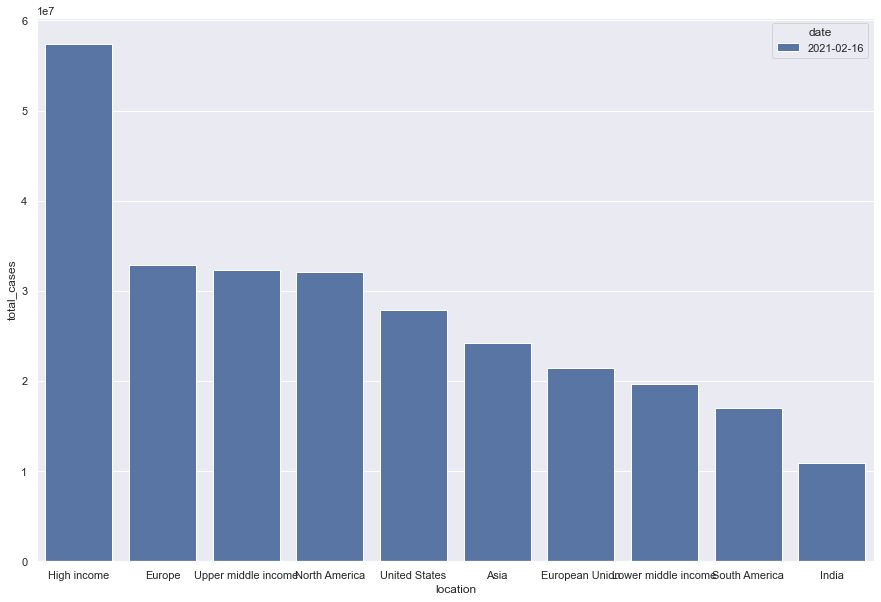

In [25]:
sns.barplot(x="location",y="total_cases",data = maximum_cases_countary[1:11],hue ="date")
plt.show()